In [1]:
!pip install tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 2.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 71.5 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 72.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 71.2 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.3/80.3 kB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.7/133.7 kB 22.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 72.4 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 73.6 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 68.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 36.7 MB/

In [2]:
import tensorflow as tf

2024-05-01 09:31:09.978561: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-01 09:31:09.982964: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-01 09:31:10.055522: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-01 09:31:11.249209: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
#Batch normalization (also known as batch norm) is a method used to make training of artificial neural networks faster and more stable through normalization of the layers' inputs by re-centering and re-scaling
#Batch normalization is a deep learning approach that has been shown to significantly improve the efficiency and reliability of neural network models. It is particularly useful for training very deep networks, as it can help to reduce the internal covariate shift that can occur during training.

In [4]:
#2Batch normalization helps in stabilizing and accelerating the training process of neural networks, thereby allowing for the use of higher learning rates without the risk of divergence. By normalizing the inputs of each layer to have a mean of zero and a variance of one, it reduces the internal covariate shift.

In [5]:
#3 These parameters are used for re-scaling (γ) and shifting(β) of the vector containing values from the previous operations. These two are learnable parameters, during the training neural network ensures the optimal values of γ and β are used. That will enable the accurate normalization of each batch.

In [6]:
#q2

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [8]:
print(f"Tensorflow Version{tf.__version__}")
print(f"keras version{tf.keras.__version__}")

Tensorflow Version2.16.1
keras version3.3.3


In [9]:
os.getcwd()

'/home/jovyan/work'

In [10]:
tf.config.list_physical_devices("GPU")

[]

In [11]:
tf.config.list_physical_devices("CPU")

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [12]:
check_list=['GPU','CPU']
for device in check_list:
    out=tf.config.list_physical_devices(device)
    if len(out)> 0:
        print(f"{device}is available")
        print(f"Details >>{out}")
        
    else:
        print(f"{device} is not available")

GPU is not available
CPUis available
Details >>[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


In [13]:
mnist=tf.keras.datasets.mnist
(X_train_full,y_train_full),(X_test,y_test)=mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [14]:
print(f"data type of X_train_full:{X_train_full.dtype},\n shape of X_train_full{X_train_full.shape}")

data type of X_train_full:uint8,
 shape of X_train_full(60000, 28, 28)


In [15]:
X_test.shape

(10000, 28, 28)

In [16]:
len(X_test[1][0])

28

In [17]:
X_valid,X_train=X_train_full[:5000]/255,X_train_full[5000:]/255
y_valid,y_train=y_train_full[:5000]/255,y_train_full[5000:]/255

In [18]:
len(X_train_full[5000:])
X_test=X_test/255
import seaborn as sns

<AxesSubplot: >

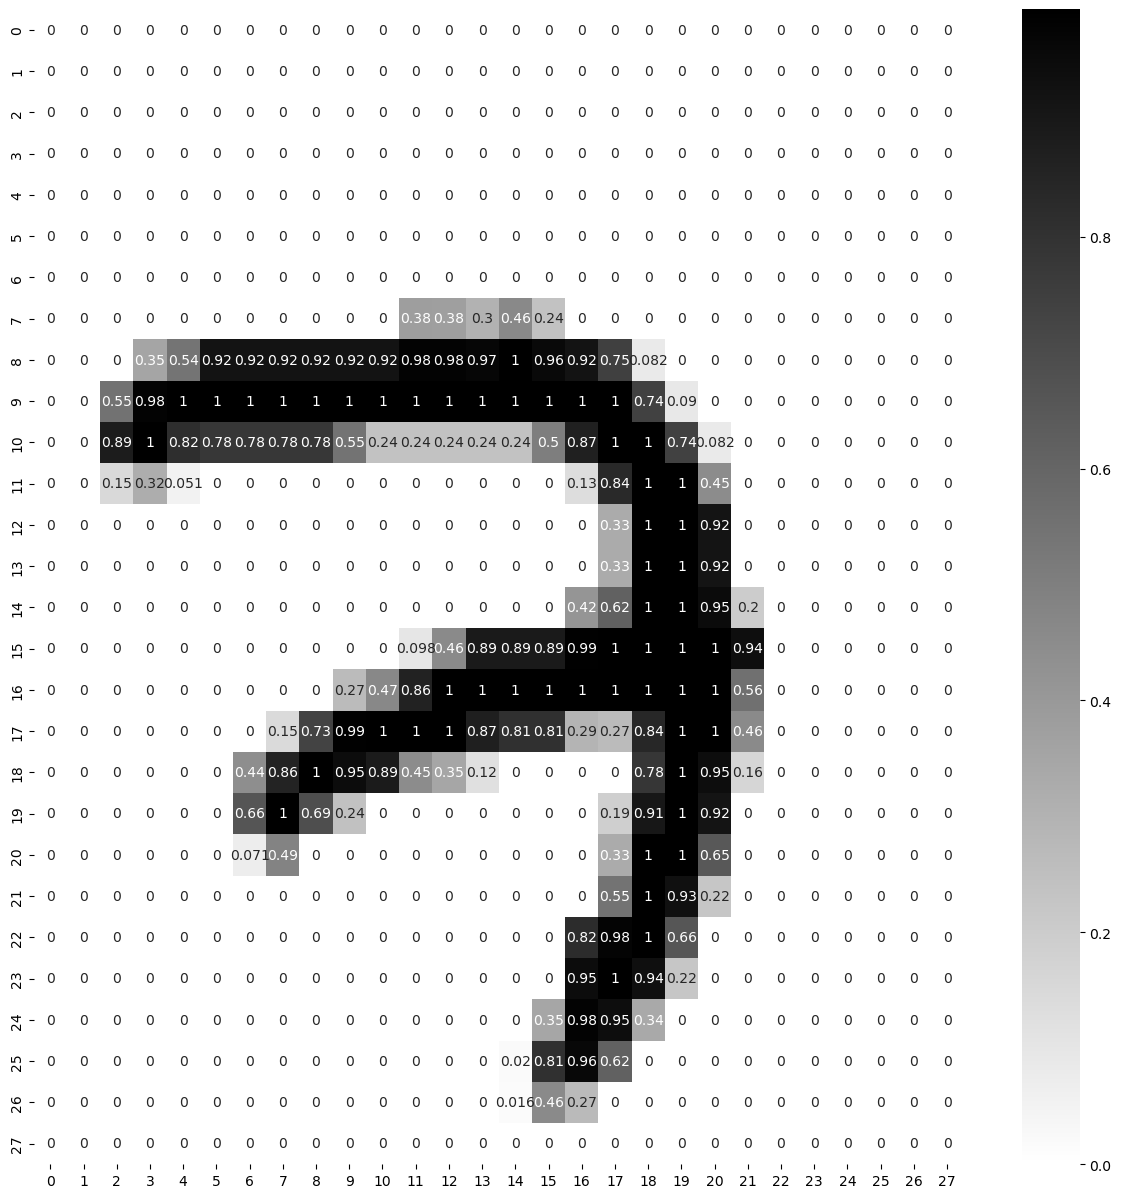

In [19]:
plt.figure(figsize=(15,15))
sns.heatmap(X_train[0],annot=True,cmap="binary")

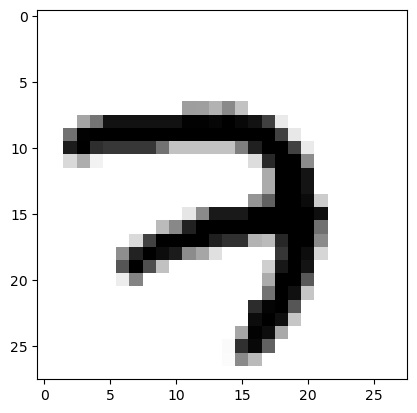

In [20]:
plt.imshow(X_train[0],cmap='binary')


In [21]:
LAYERS= [tf.keras.layers.Flatten(input_shape=[28,28],name='inputLayer'),
        tf.keras.layers.Dense(300,activation="relu",name="hiddenLayer1"),
        tf.keras.layers.Dense(100,activation="relu",name="hiddenLayer2"),
        tf.keras.layers.Dense(10,activation='softmax',name='outputLayer')]

/opt/conda/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [22]:
model_clf=tf.keras.models.Sequential(LAYERS)

In [23]:
model_clf.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ inputLayer (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hiddenLayer1 (Dense)            │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hiddenLayer2 (Dense)            │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ outputLayer (Dense)             │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [24]:
model_clf.layers

[<Flatten name=inputLayer, built=True>,
 <Dense name=hiddenLayer1, built=True>,
 <Dense name=hiddenLayer2, built=True>,
 <Dense name=outputLayer, built=True>]

In [25]:
hidden1=model_clf.layers[1]
hidden1.name

'hiddenLayer1'

In [26]:
len(hidden1.get_weights()[1])

300

In [28]:
weights,biases=hidden1.get_weights()

In [29]:
print("shape\n",weights.shape,"\n")

shape
 (784, 300) 



In [32]:
LOSS_FUNCTION="sparse_categorical_crossentropy"
OPTIMIZER="SGD"
METRICS=["accuracy"]

model_clf.compile(loss=LOSS_FUNCTION,
                 optimizer=OPTIMIZER,
                 metrics=METRICS)

In [34]:
EPOCHS=30
VALIDATION_SET=(X_valid,y_valid)

history =model_clf.fit(X_train,y_train,epochs=EPOCHS,validation_data=VALIDATION_SET,batch_size=32)

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.0983 - loss: 0.0756 - val_accuracy: 0.0958 - val_loss: 5.8480e-04
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.1009 - loss: 5.3926e-04 - val_accuracy: 0.0958 - val_loss: 2.6753e-04
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.1008 - loss: 2.6515e-04 - val_accuracy: 0.0958 - val_loss: 1.7013e-04
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.0982 - loss: 1.7809e-04 - val_accuracy: 0.0958 - val_loss: 1.2360e-04
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.0993 - loss: 1.2945e-04 - val_accuracy: 0.0958 - val_loss: 9.6560e-05
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.0976 - loss: 1.1372e-04 - val_accuracy: 0.0958 - val_loss: 7.8956e-05
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.0992 - loss: 8.6084e-05 - val_accuracy: 0.0958 - val_loss: 6.6622e-05
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━

In [35]:
history.params

{'verbose': 'auto', 'epochs': 30, 'steps': 1719}

In [36]:
pd.DataFrame(history.history)

,accuracy,loss,val_accuracy,val_loss
0,0.098818,0.015305,0.0958,0.000585
1,0.098982,0.000442,0.0958,0.000268
2,0.098982,0.000245,0.0958,0.000170
3,0.098982,0.000168,0.0958,0.000124
4,0.098982,0.000128,0.0958,0.000097
5,0.098982,0.000103,0.0958,0.000079
6,0.098982,0.000086,0.0958,0.000067
7,0.098982,0.000073,0.0958,0.000058
8,0.098982,0.000064,0.0958,0.000051
9,0.098982,0.000057,0.0958,0.000045


<AxesSubplot: >

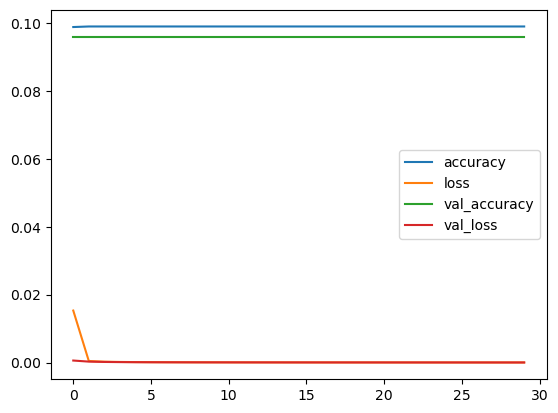

In [37]:
pd.DataFrame(history.history).plot()

In [38]:
model_clf.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.0924 - loss: 17.7940


[18.582674026489258, 0.09799999743700027]

In [41]:
LAYERS=[tf.keras.layers.Flatten(input_shape=[28,28]),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(300,activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(100,activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(10,activation='softmax'),
        tf.keras.layers.BatchNormalization()]

/opt/conda/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [42]:
model_clf1=tf.keras.models.Sequential(LAYERS)

In [43]:
model_clf1.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 784)            │         3,136 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 300)            │         1,200 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 10)             │            40 │
│ (BatchNormalization)            │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 271,386 (1.04 MB)

 Trainable params: 268,998 (1.03 MB)

 Non-trainable params: 2,388 (9.33 KB)

In [46]:
model_clf.compile(
    loss=LOSS_FUNCTION,
    optimizer=OPTIMIZER,metrics=METRICS
    
                            )

In [49]:
EPOCHS=30
VALIDATION_SET=[X_valid,y_valid]
history1=model_clf.fit(X_train,y_train,epochs=EPOCHS,validation_data=VALIDATION_SET,batch_size=32)

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.0998 - loss: 7.7030e-06 - val_accuracy: 0.0958 - val_loss: 6.3080e-06
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.0984 - loss: 7.5469e-06 - val_accuracy: 0.0958 - val_loss: 6.1996e-06
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.0994 - loss: 7.2694e-06 - val_accuracy: 0.0958 - val_loss: 6.0934e-06
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.0989 - loss: 7.0541e-06 - val_accuracy: 0.0958 - val_loss: 5.9913e-06
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.1001 - loss: 7.0991e-06 - val_accuracy: 0.0958 - val_loss: 5.8929e-06
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.0977 - loss: 7.8358e-06 - val_accuracy: 0.0958 - val_loss: 5.7971e-06
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.0981 - loss: 6.3018e-06 - val_accuracy: 0.0958 - val_loss: 5.7042e-06
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━

<AxesSubplot: >

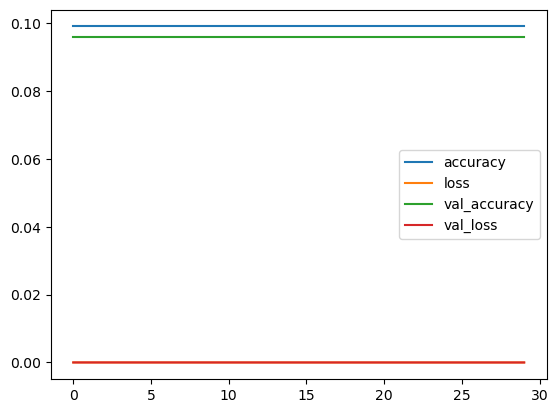

In [48]:
pd.DataFrame(history1.history).plot()

In [ ]:
###by the use of batch normalization we can easily see the change of graph of  loss in both noramlizaion 